In [9]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


import yfinance as yf
import html5lib
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime


def make_graph(stock_data, revenue_data, stock):
    stock_target_date = datetime.strptime('2021-06-14', '%Y-%m-%d')
    revenue_target_date = datetime.strptime('2021-04-30', '%Y-%m-%d')
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[pd.to_datetime(stock_data['Date']) <= stock_target_date]
    revenue_data_specific = revenue_data[pd.to_datetime(revenue_data['Date']) <= revenue_target_date]
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    


/resources/labs/PY0220EN


ModuleNotFoundError: No module named 'PY0220EN'

In [23]:
def plot_tesla():
    #Using yfinance to Extract Stock Data
    tesla = yf.Ticker("TSLA")
    tesla_data = tesla.history(period="max")
    tesla_data.reset_index(inplace=True)
    tesla_data.head() #show first 5 records
    
    #Using Webscraping to Extract Tesla Revenue Data
    url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
    html_data = requests.get(url).text #response is saved into html_data as text
    soup = BeautifulSoup(html_data, 'html5lib') #Parsing html data using beautiful soup 
    # After parsing the HTML content, Pandas stores the resulting tables in a list called html_data. Here, we assume that the first item in the list (index 0) represents the desired DataFrame # containing the table data. We extract and assign it to the variable tesla_revenue. # You can adjust the index if the web page contains multiple tables, and you want to work with a specific one. 
    tesla_revenue = pd.read_html(str(soup))[0]
    tesla_revenue.columns = ['Date', 'Revenue'] #Set the column names
    tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True) #Remove the comma and dollar sign from the Revenue column.
    #remove null or empty strings in the Revenue column
    tesla_revenue.dropna(inplace=True)
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
    tesla_revenue.tail(5) #Show last records in the table
    
    make_graph(tesla_data, tesla_revenue, 'Tesla')#Plot data and revenue for Tesla
    
    
def plot_gme():
    #Using yfinance to Extract Stock Data
    gamestop = yf.Ticker("GME")
    gme_data = gamestop.history(period='max')
    gme_data.reset_index(inplace=True)
    gme_data.head() #Show first 5 records
    
    #Using Webscraping to Extract Tesla Revenue Data
    url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
    gme_html_data = requests.get(url).text
    soup = BeautifulSoup(gme_html_data, 'html5lib')
    gme_revenue = pd.read_html(str(soup))[0]
    gme_revenue.columns = ['Date', 'Revenue']
    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True) #Remove the comma and dollar sign from the Revenue column.
    gme_revenue.tail(5) #Show last 5 records
    
    make_graph(gme_data, gme_revenue, 'GameStop')#Plot data and revenue for GameStop
    

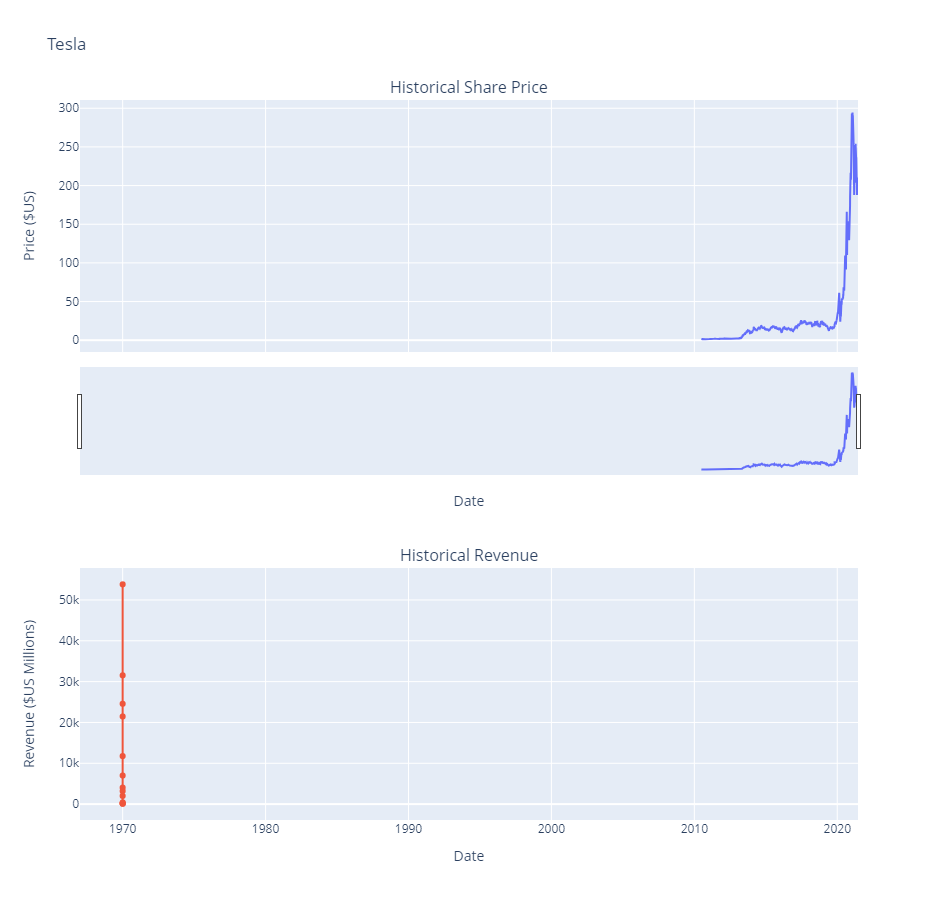

__________________________________________________________________________________________________________________________________


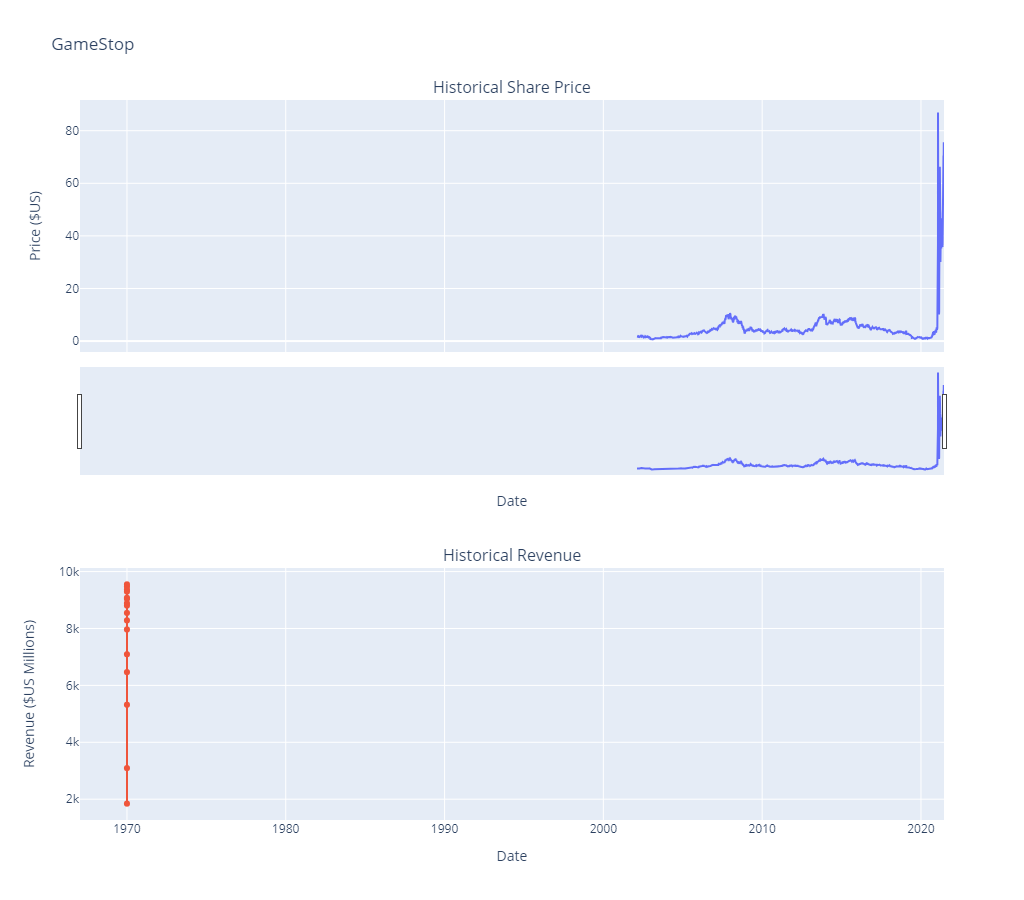

In [30]:
plot_tesla()
print("_" *130)
plot_gme()